Install necessary libraries

In [1]:
!pip install visualkeras
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Import all the dependencies - the initial model was made following the Kaggle tutorial Fashion MNIST / CNN Beginner (98%)

In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

2023-02-01 15:03:04.784183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 15:03:04.888079: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-01 15:03:05.480715: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-01 15:03:05.480778

Set model parameters

In [3]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 0
No_epochs = 100
Batch_size = 128

Loading and labeling the data

In [4]:
train_dataset = pd.read_csv("fashion-mnist_train.csv")
test_dataset = pd.read_csv("fashion-mnist_test.csv")

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Preprocessing the data

In [5]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

Creating the model

In [6]:
model = tf.keras.Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

2023-02-01 15:03:12.229223: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13582 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-02-01 15:03:12.233317: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 1057 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5
/home/jovyan/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Train the model and stop early to avoid overfitting

In [7]:
callback_val_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [8]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val),
                  callbacks=callback_val_loss)

Epoch 1/100


2023-02-01 15:03:13.640219: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-02-01 15:03:14.477807: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400


352/352 [==============================] - 7s 14ms/step - loss: 0.5960 - accuracy: 0.7840 - val_loss: 0.4161 - val_accuracy: 0.8361
Epoch 2/100
352/352 [==============================] - 4s 12ms/step - loss: 0.4115 - accuracy: 0.8474 - val_loss: 0.3342 - val_accuracy: 0.8791
Epoch 3/100
352/352 [==============================] - 4s 12ms/step - loss: 0.3577 - accuracy: 0.8650 - val_loss: 0.3287 - val_accuracy: 0.8707
Epoch 4/100
352/352 [==============================] - 4s 12ms/step - loss: 0.3264 - accuracy: 0.8779 - val_loss: 0.2683 - val_accuracy: 0.9019
Epoch 5/100
352/352 [==============================] - 4s 12ms/step - loss: 0.3045 - accuracy: 0.8854 - val_loss: 0.2721 - val_accuracy: 0.8951
Epoch 6/100
352/352 [==============================] - 4s 12ms/step - loss: 0.2880 - accuracy: 0.8923 - val_loss: 0.2603 - val_accuracy: 0.9035
Epoch 7/100
352/352 [==============================] - 4s 12ms/step - loss: 0.2723 - accuracy: 0.9000 - val_loss: 0.2455 - val_accuracy: 0.9060
Epoc

Save the model

In [13]:
model.save('init_model_no_overfit')

INFO:tensorflow:Assets written to: init_model_no_overfit/assets


INFO:tensorflow:Assets written to: init_model_no_overfit/assets


Evaluate the model

In [9]:
score = model.evaluate(X_test, y_test, steps = math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1868 - accuracy: 0.9320
Test loss: 0.18682004511356354
Test accuracy: 0.9319999814033508


Visualize the results

313/313 [==============================] - 2s 5ms/step


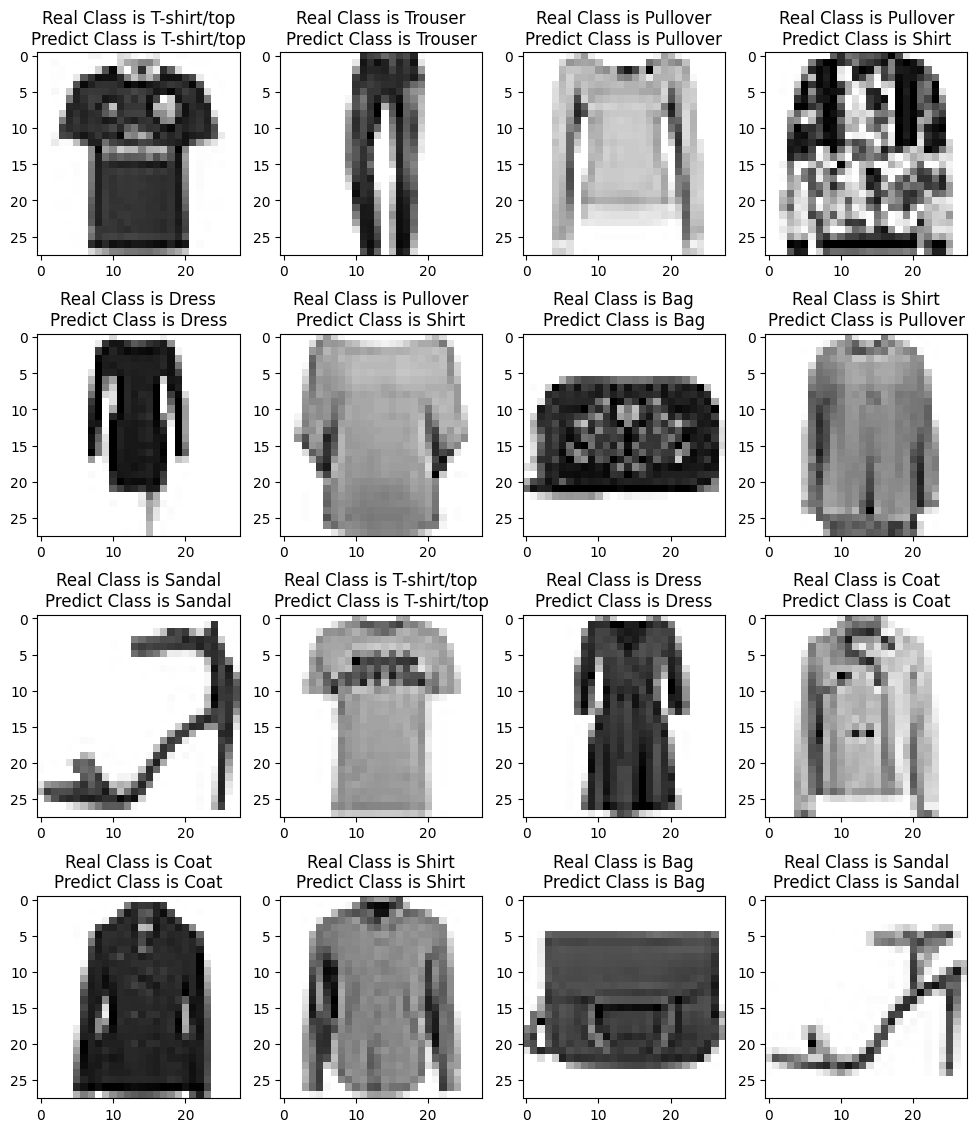

In [10]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");

313/313 [==============================] - 1s 4ms/step


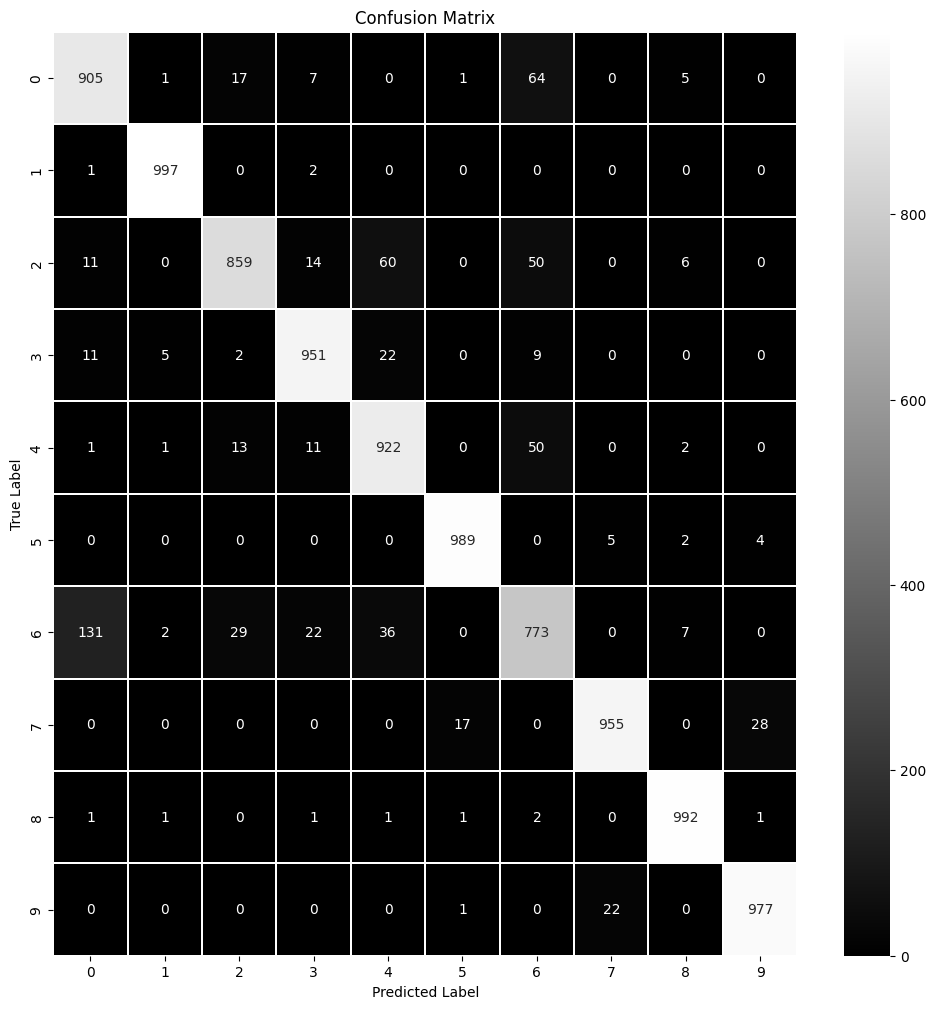

In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()